In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from chardet import detect

In [2]:
# After noticing some strange characters in excel, I checked for the character encoding
def get_encoding_type(file):
    with open(file, 'rb') as f:
        rawdata = f.read()
    return detect(rawdata)['encoding']

In [3]:
file = '/content/lagos-restaurants.csv'

In [4]:
print(get_encoding_type(file))

MacRoman


In [5]:
# reading into a dataframe with the encoding attribute set to the type obtained
df = pd.read_csv(file, encoding='macroman')

In [6]:
df.head()

,author_name,review_title,review_text,author_rating,visit_date,overall_rating,restaurant_name
0,N9599MZaisham,Less than basic taste,For a brand that claims to have one of the bes...,20,1 Sep 2022,2.0,01 Shawarma
1,T-Africa2000,Much improved,We had a business dinner at 1415 this week and...,40,1 Jan 2020,4.0,1415 Steakhouse Seafood Restaurant
2,sunilt1960,Calm and Relaxing,Had dinner at this restaurant while staying in...,45,1 Feb 2019,4.0,1415 Steakhouse Seafood Restaurant
3,ooobabatunde,Better,Thank you for staying with us in Eko Hotels & ...,45,1 Jan 2019,4.0,1415 Steakhouse Seafood Restaurant
4,MrTraveller420,1415 Steakhouse,Went over to the old location of the Steakhous...,40,1 Nov 2018,4.0,1415 Steakhouse Seafood Restaurant


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8294 entries, 0 to 8293
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   author_name      8294 non-null   object 
 1   review_title     8294 non-null   object 
 2   review_text      8294 non-null   object 
 3   author_rating    8294 non-null   int64  
 4   visit_date       8065 non-null   object 
 5   overall_rating   8294 non-null   float64
 6   restaurant_name  8294 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 453.7+ KB


## Data Dictionary

1. `author_name` - The author's name and surname abbreviated or username.
2. `review_title` - A short text summing up the author's experience.
3. `review_text` - Details of the author's experience.
4. `author_rating` - 5-star system to rate the author's experience.
5. `visit_date` - The date the author had the experience.
6. `overall_rating` - The average restaurant rating.
7. `restaurant_name` - The name of the establishment.

## Changing Datatypes
- `visit_date` to a datetime object, even though the dates on the website are just the month and year.
- `author_rating` to a float after converting to a 5-star system

In [8]:
# converting author rating column to a 5 star system
df['author_rating'] = df['author_rating'] / 10

In [9]:
df.head()

,author_name,review_title,review_text,author_rating,visit_date,overall_rating,restaurant_name
0,N9599MZaisham,Less than basic taste,For a brand that claims to have one of the bes...,2.0,1 Sep 2022,2.0,01 Shawarma
1,T-Africa2000,Much improved,We had a business dinner at 1415 this week and...,4.0,1 Jan 2020,4.0,1415 Steakhouse Seafood Restaurant
2,sunilt1960,Calm and Relaxing,Had dinner at this restaurant while staying in...,4.5,1 Feb 2019,4.0,1415 Steakhouse Seafood Restaurant
3,ooobabatunde,Better,Thank you for staying with us in Eko Hotels & ...,4.5,1 Jan 2019,4.0,1415 Steakhouse Seafood Restaurant
4,MrTraveller420,1415 Steakhouse,Went over to the old location of the Steakhous...,4.0,1 Nov 2018,4.0,1415 Steakhouse Seafood Restaurant


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8294 entries, 0 to 8293
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   author_name      8294 non-null   object 
 1   review_title     8294 non-null   object 
 2   review_text      8294 non-null   object 
 3   author_rating    8294 non-null   float64
 4   visit_date       8065 non-null   object 
 5   overall_rating   8294 non-null   float64
 6   restaurant_name  8294 non-null   object 
dtypes: float64(2), object(5)
memory usage: 453.7+ KB


In [11]:
# converting visit date column to datetime
df['visit_date'] = pd.to_datetime(df['visit_date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8294 entries, 0 to 8293
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   author_name      8294 non-null   object        
 1   review_title     8294 non-null   object        
 2   review_text      8294 non-null   object        
 3   author_rating    8294 non-null   float64       
 4   visit_date       8065 non-null   datetime64[ns]
 5   overall_rating   8294 non-null   float64       
 6   restaurant_name  8294 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 453.7+ KB


## Removing unwanted characters
- Changing the character encoding of the `review_title` and `review_text` columns to UTF-8. This removes the strange characters noticed while skimming through the character in Excel.

- Removing 'More' from the `review_text` column. 'More' is mostly present in texts that were too long, so they were cut short on the TripAdvisor website. Unfortunately, it was not avoidable when scraping.

In [13]:
df['review_text'] = df['review_text'].str.encode('utf-8').str.decode('MacRoman')

In [14]:
df['review_title'] = df['review_title'].str.encode('utf-8').str.decode('MacRoman')

In [15]:
df['review_text'] = df['review_text'].replace('More', ' ')

In [16]:
# saving the clean text to a new file
df.to_csv('clean_lagos_restaurants.csv', index=True)

In [17]:
file = '/content/clean_lagos_restaurants.csv'

In [18]:
print(get_encoding_type(file))

utf-8


## Data Exploration through Visualisation

- Exploring the distribution of the overall ratings.
- The most frequent used phases used in the review titles.

In [19]:
df.describe()

,author_rating,overall_rating
count,8294.000000,8294.000000
mean,4.071075,4.088920
std,0.865475,0.372414
min,1.000000,1.000000
25%,4.000000,4.000000
50%,4.000000,4.000000
75%,5.000000,4.500000
max,5.000000,5.000000


Th minimum author rating is 1.0 and the average is 4.0

- Using Sturges rule to determine the number of bins, we have 15 bins

<Axes: title={'center': 'overall_rating'}, ylabel='Frequency'>

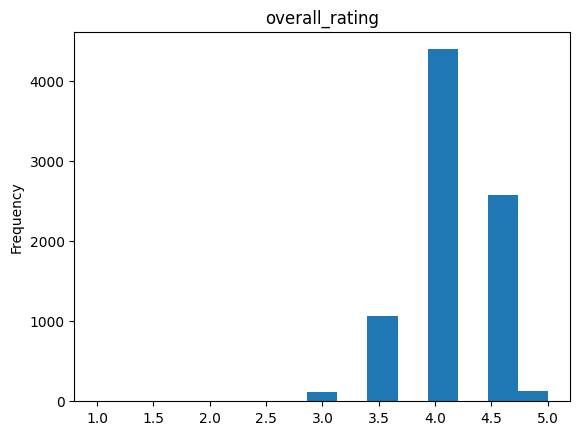

In [20]:
# Distribution of overall ratings
df['overall_rating'].plot(kind='hist', bins=15, title='overall_rating')

The histogram shows a leftly skewed distribution with most of the scraped ratings being from 4.0 upwards. However, there are really few restaurants on TripAdvisor with lower than 3.0 ratings.

In [21]:
!pip install wordcloud

In [26]:
# separating the reviews into two dataframes; one for overall ratings below 3.0 and one for 3.0 and above
low_df = df.loc[df['overall_rating'] < 3.0]
high_df = df.loc[df['overall_rating'] >= 3.0]

In [23]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

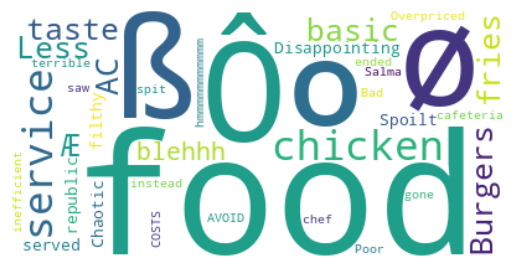

In [27]:
# wordcloud for negative ratings
text = ' '.join(title for title in low_df['review_title'])

stopwords = set(STOPWORDS)
stopwords.update(["lagos", "breakfast", "dinner", "lunch", "nigeria"])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

"Terrible", "Spoilt", "Poor", "Basic", "Disappointing", "Overpriced" and "Inefficient" are some of the common words used for the negative ratings

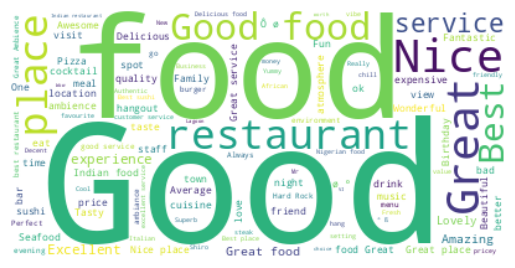

In [28]:
# wordcloud for positive ratings
text = ' '.join(title for title in high_df['review_title'])

stopwords = set(STOPWORDS)
stopwords.update(["lagos", "breakfast", "dinner", "lunch", "nigeria"])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems most of our visitors with positive ratings used "Good", "Great", "Best", "Beautiful", "Excellent", "Amazing", "Great service" and "Nice" in their review titles!